<a href="https://colab.research.google.com/github/skhabiri/DS-Unit-2-Applied-Modeling/blob/master/module4-model-interpretation/skhabiri_LS_DS_build2_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


*Unit 2, Sprint 3, Module 4*

---


In [1]:
import pandas as pd
import numpy as np
# !pip install category_encoders==2.*


data = pd.read_csv('https://github.com/skhabiri/FORESTCOVER-METRICS/blob/master/data/train.csv?raw=true')
print(data.shape)
data.head()


(15120, 56)


,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,...,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,...,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,...,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,...,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,...,0,0,0,0,0,0,0,0,0,5


In [2]:
data.describe()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,15120.00000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,...,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000
mean,7560.50000,2749.322553,156.676653,16.501587,227.195701,51.076521,1714.023214,212.704299,218.965608,135.091997,...,0.045635,0.040741,0.001455,0.006746,0.000661,0.002249,0.048148,0.043452,0.030357,4.000000
std,4364.91237,417.678187,110.085801,8.453927,210.075296,61.239406,1325.066358,30.561287,22.801966,45.895189,...,0.208699,0.197696,0.038118,0.081859,0.025710,0.047368,0.214086,0.203880,0.171574,2.000066
min,1.00000,1863.000000,0.000000,0.000000,0.000000,-146.000000,0.000000,0.000000,99.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,3780.75000,2376.000000,65.000000,10.000000,67.000000,5.000000,764.000000,196.000000,207.000000,106.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,7560.50000,2752.000000,126.000000,15.000000,180.000000,32.000000,1316.000000,220.000000,223.000000,138.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,11340.25000,3104.000000,261.000000,22.000000,330.000000,79.000000,2270.000000,235.000000,235.000000,167.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
max,15120.00000,3849.000000,360.000000,52.000000,1343.000000,554.000000,6890.000000,254.000000,254.000000,248.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


In [3]:
data.nunique().sort_values(ascending=False)

Id                                    15120
Horizontal_Distance_To_Roadways        3250
Horizontal_Distance_To_Fire_Points     2710
Elevation                              1665
Vertical_Distance_To_Hydrology          423
Horizontal_Distance_To_Hydrology        400
Aspect                                  361
Hillshade_3pm                           247
Hillshade_9am                           176
Hillshade_Noon                          141
Slope                                    52
Cover_Type                                7
Soil_Type29                               2
Soil_Type28                               2
Soil_Type5                                2
Soil_Type4                                2
Soil_Type3                                2
Soil_Type2                                2
Soil_Type1                                2
Wilderness_Area4                          2
Wilderness_Area3                          2
Wilderness_Area2                          2
Wilderness_Area1                

In [4]:
data["Cover_Type"].value_counts(normalize=True)

7    0.142857
6    0.142857
5    0.142857
4    0.142857
3    0.142857
2    0.142857
1    0.142857
Name: Cover_Type, dtype: float64

In [5]:
# pd.Series({c: data[c].unique() for c in data})[-40:]
# [data[col].unique() for col in data]

In [6]:
%matplotlib inline
import category_encoders as ce
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer

from sklearn.impute import SimpleImputer

from sklearn.linear_model import RidgeCV
from sklearn.linear_model import RidgeClassifier
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

from xgboost import XGBClassifier

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import validation_curve
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, mean_absolute_error
from sklearn.metrics import plot_confusion_matrix, classification_report, confusion_matrix


import random 
%matplotlib inline


Our target label is "Cover_Type"
We will drop imb% imbalance low cardinal features. We also drop "id" column.

In [7]:
def skew_col(X, imb=0.99):
  '''
  Returns the sorted list of feature names 
  with imbalance exceeding imb value
  '''
  X=X.copy()
  # drop the binary features with imb% imbalance
  # mask = X.nunique().sort_values(ascending=False) < 5
  # lowcard_col = X.nunique().sort_values(ascending=False)[mask].index

  mask2 = pd.Series({col: X[col].value_counts().
                     max()/X[col].value_counts().
                     sum() for col in X.nunique().index}).sort_values(ascending=False)
  
  mask2 = mask2[mask2 >= imb]

  Id_skew_cols = ["Id"] + list(mask2.index) 
  return Id_skew_cols

### Train Test split:
Target = "Cover_Type"

In [8]:
from sklearn.model_selection import train_test_split

# Split train into train & val
train, val = train_test_split(data, train_size=0.80, test_size=0.20, stratify=data["Cover_Type"], 
                                random_state=42)
print(f'train: {train.shape}, val: {val.shape}')


# Separate class label and data 
y_train = train["Cover_Type"]
X_train = train.drop("Cover_Type", axis=1)
y_val = val["Cover_Type"]
X_val = val.drop("Cover_Type", axis=1)

train: (12096, 56), val: (3024, 56)


In [9]:
Id_skew_cols = skew_col(X_train, imb=0.999)
Id_skew_cols

['Id',
 'Soil_Type15',
 'Soil_Type7',
 'Soil_Type25',
 'Soil_Type8',
 'Soil_Type28',
 'Soil_Type9',
 'Soil_Type36',
 'Soil_Type27']

In [10]:
def wrangle(X, cols, drop_count=1):
  '''
  drops drop_count number of features from cols starting from index=0 (Id)
  '''  
  # print("running transformer ....")
  X = X.copy()
  X = X.drop(labels=cols[:drop_count], axis=1)
  return X


### Baseline model

In [11]:
y_train.value_counts(normalize=True)

7    0.142857
6    0.142857
5    0.142857
4    0.142857
3    0.142857
2    0.142857
1    0.142857
Name: Cover_Type, dtype: float64

* Check for Nan value

In [12]:
X_train.isna().sum(axis=0).sum()

0

In [51]:
est_dict = {
    lr: LogisticRegression(),
    rc: RidgeClassifier(),
    rfc: RandomForestClassifier(),
    gbc: GradientBoostingClassifier(),
    xgbc: XGBClassifier()
            }

In [37]:
def clf_name(estimator, est_dict):
  return est_dict[estimator].__class__.__name__

In [38]:
LogisticRegression().__class__.__name__

'LogisticRegression'

### functions for pipeline fit, and metrics

In [14]:
def fit_rep(estimator, X_train, y_train, X_val, y_val, kwargs_dict):
  estimator.set_params(functiontransformer__kw_args = kwargs_dict)

  print("\n fitting ...")
  estimator.fit(X_train, y_train)

  print("\n getting X_train transformed column labels")
  feat_name = estimator.named_steps['functiontransformer'].transform(X_train).columns
  print("X_train cols:", len(X_train.columns), "X_fit cols:", len(feat_name))
  assert len(X_train.columns) == len(feat_name) + drop_count

  print("\n predicting ...")
  y_pred = estimator.predict(X_val)
  
  score_train = estimator.score(X_train, y_train)
  score_val = estimator.score(X_val, y_val)

  print("\n score ...")
  print('Training score', score_train)
  print('Validation score', score_val)

  accuracy_score_train = accuracy_score(y_train, estimator.predict(X_train))
  accuracy_score_val = accuracy_score(y_val, y_pred)

  print("\n Accuracy ...")
  print('Training Accuracy', accuracy_score_train)
  print('Validation Accuracy', accuracy_score_val)

  return estimator, y_pred, feat_name


In [16]:
def metric_rep(estimator, X_val, y_val):
  
  print("\n predicting y ...")
  y_pred = estimator.predict(X_val)
  
  print("\n plotting confusion matrix ...")
  plt.rcParams['figure.dpi'] = 100
  plot_confusion_matrix(estimator, X_val, y_val, values_format='.0f', xticks_rotation='vertical')
  
  print("\n calculating confusion matrix ...")
  C = pd.DataFrame(confusion_matrix(y_val, y_pred))
  print(C)
  truth_sum = C.sum(axis=1)
  predict_sum = C.sum(axis=0)
  pred_t = pd.Series([C.iloc[i,i] for i in range(len(C))])

  recall = pred_t / truth_sum
  precision = pred_t / predict_sum
  accuracy = pred_t.sum() / truth_sum.sum()

  print("\n classification report ...")
  print(classification_report(y_val, y_pred, target_names=estimator.classes_.astype(str)))

  print(f"******\n accuracy is {accuracy:.2f}\n******")

  return accuracy, precision, recall

In [17]:
drop_count = len(Id_skew_cols)
drop_cols = Id_skew_cols
kwargs_dict ={'drop_count': drop_count,
              'cols': drop_cols
              }

In [18]:
# LogisticRegression
lr = make_pipeline(
    FunctionTransformer(wrangle, validate=False), 
    StandardScaler(),
    LogisticRegression(random_state=42)
    )

In [52]:
import sklearn
sklearn.set_config(print_changed_only=False, display=None)

In [31]:
lr.named_steps['functiontransformer']

FunctionTransformer(accept_sparse=False, check_inverse=True,
                    func=<function wrangle at 0x10ec08710>, inv_kw_args=None,
                    inverse_func=None, kw_args=None, validate=False)

In [41]:
# RidgeClassifier
rc = make_pipeline(
    FunctionTransformer(wrangle, validate=False), 
    StandardScaler(),
    RidgeClassifier(alpha=1.0, fit_intercept=True, normalize=False, copy_X=True, 
                    max_iter=None, tol=0.001, class_weight=None, solver='auto', 
                    random_state=42)
    )

In [42]:
# RandomForestClassifier
rfc = make_pipeline(
        FunctionTransformer(wrangle, validate=False), 
        # ce.OneHotEncoder(use_cat_names=True), 
        # SimpleImputer(strategy='median'), 
        RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=20, max_features=0.5,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
                       oob_score=False, random_state=42, verbose=0,
                       warm_start=False)
  ) 

In [43]:
# GradientBoostingClassifier
# It needs NaN to be dealth with
gbc = make_pipeline(
    FunctionTransformer(wrangle, validate=False), 
    # ce.OrdinalEncoder(), 
    # SimpleImputer(strategy='median'), 
    GradientBoostingClassifier()
)

In [44]:
# XGBoost
# It can handle NaNs
xgbc = make_pipeline(
    FunctionTransformer(wrangle, validate=False), 
    # ce.OrdinalEncoder(),
    XGBClassifier(n_estimators=100, random_state=42, n_jobs=6)
)

In [53]:
est = [xgbc]
for i, estimator in enumerate(est):
    print(est_dict[estimator])

XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='binary:logistic', random_state=None, reg_alpha=None,
              reg_lambda=None, scale_pos_weight=None, subsample=None,
              tree_method=None, use_label_encoder=True,
              validate_parameters=None, verbosity=None)


In [54]:
# est = [lr, rc, rfc, gbc, xgbc]
est = [xgbc]

empt_list = [np.NaN]*len(est)
feat_name = empt_list.copy()
y_pred = empt_list.copy()

for i, estimator in enumerate(est):
  print(f"********** {est_dict[estimator].__class__.__name__} **********")
  (est[i], y_pred[i], feat_name[i]) = fit_rep(estimator, X_train, y_train, X_val, y_val, kwargs_dict)


********** XGBClassifier **********

 fitting ...


/Users/shahnam/.pyenv/versions/3.7.8/lib/python3.7/site-packages/xgboost/sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:35:28] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

 getting X_train transformed column labels
X_train cols: 55 X_fit cols: 46

 predicting ...

 score ...
Training score 0.9904100529100529
Validation score 0.8541666666666666

 Accuracy ...
Training Accuracy 0.9904100529100529
Validation Accuracy 0.8541666666666666


In [56]:
# gbc.named_steps['gradientboostingclassifier'].classes_

********** XGBClassifier **********

 predicting y ...

 plotting confusion matrix ...

 calculating confusion matrix ...
     0    1    2    3    4    5    6
0  326   79    1    0    7    1   18
1   82  275   15    0   41   15    4
2    0    2  348   17    9   56    0
3    0    0    7  423    0    2    0
4    1    7   10    0  409    5    0
5    0    3   38    5    4  382    0
6   11    1    0    0    0    0  420

 classification report ...
              precision    recall  f1-score   support

           1       0.78      0.75      0.77       432
           2       0.75      0.64      0.69       432
           3       0.83      0.81      0.82       432
           4       0.95      0.98      0.96       432
           5       0.87      0.95      0.91       432
           6       0.83      0.88      0.86       432
           7       0.95      0.97      0.96       432

    accuracy                           0.85      3024
   macro avg       0.85      0.85      0.85      3024
weighted avg

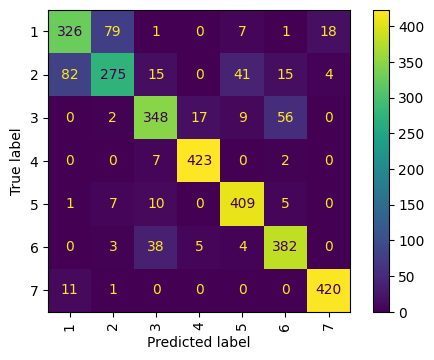

In [57]:
est2 = est.copy()
# est2 = [rfc]
empt_list = [np.NaN]*len(est2)
accuracy = empt_list[:]
precision = empt_list.copy()
recall = empt_list.copy()

for i, estimator in enumerate(est2):
  print(f"********** {est_dict[estimator].__class__.__name__} **********")
  (accuracy[i], precision[i], recall[i]) = metric_rep(estimator, X_val, y_val);

In [76]:
## tree depth analysis
# max_depth = list()
# for tree in xgbc.named_steps["xgbclassifier"].estimators_:
#     max_depth.append(tree.tree_.max_depth)
# print(f"avg max depth {sum(max_depth)/len(max_depth)}")

### feature_importances and permutation_importance

In [77]:
selected_feat = feat_name[0]

In [82]:
# sklearn permutation_importances
from sklearn.inspection import permutation_importance
def important_features(estimator, est_dict, X_val, y_val, selected_feat, n_feat=25, n_repeats=5):
  '''
  n_feat: number of top features
  n_repeats: number of prmutations per column
  '''
  #permutation importance does not see function transformer and column reduction. Hence permutates over all X_val columns
  # permutation shuffles each column of X_val n_repeats time and take a mean
  result = permutation_importance(estimator, X_val, y_val, 
                                n_repeats=n_repeats, random_state=42)
  print(result.keys())
  df = pd.DataFrame({'feature': X_val.columns,
                   'importances_mean': np.round(result['importances_mean'], 4),
                   'importances_std': result['importances_std']
                   })

  # Selecting selected columns by estimator
  df = df[df.loc[:,"feature"].isin(selected_feat)]

  # feature_importance metric directly from the estimator
  df["feature_importance"] = estimator.named_steps[est_dict[estimator].__class__.__name__.lower()].feature_importances_

  # Sorting based on permutation importance values
  df = df.sort_values(by='importances_mean', ascending=False)
  df = df.rename(columns={'importances_mean': 'permutation_importance'})
  
  # Plotting top n features and comparing permutation vs. estimator feature important values.
  ax = df.iloc[:n_feat,:].plot(x="feature", y=["permutation_importance", "feature_importance"], 
                               kind='barh', figsize=(8,n_feat/2), 
                               title = f"top {n_feat} important features in {est_dict[estimator].__class__.__name__}")
  ax.invert_yaxis()
  ax.set_xlabel("importance value")
  plt.show()
  
  return df

********** XGBClassifier **********
dict_keys(['importances_mean', 'importances_std', 'importances'])


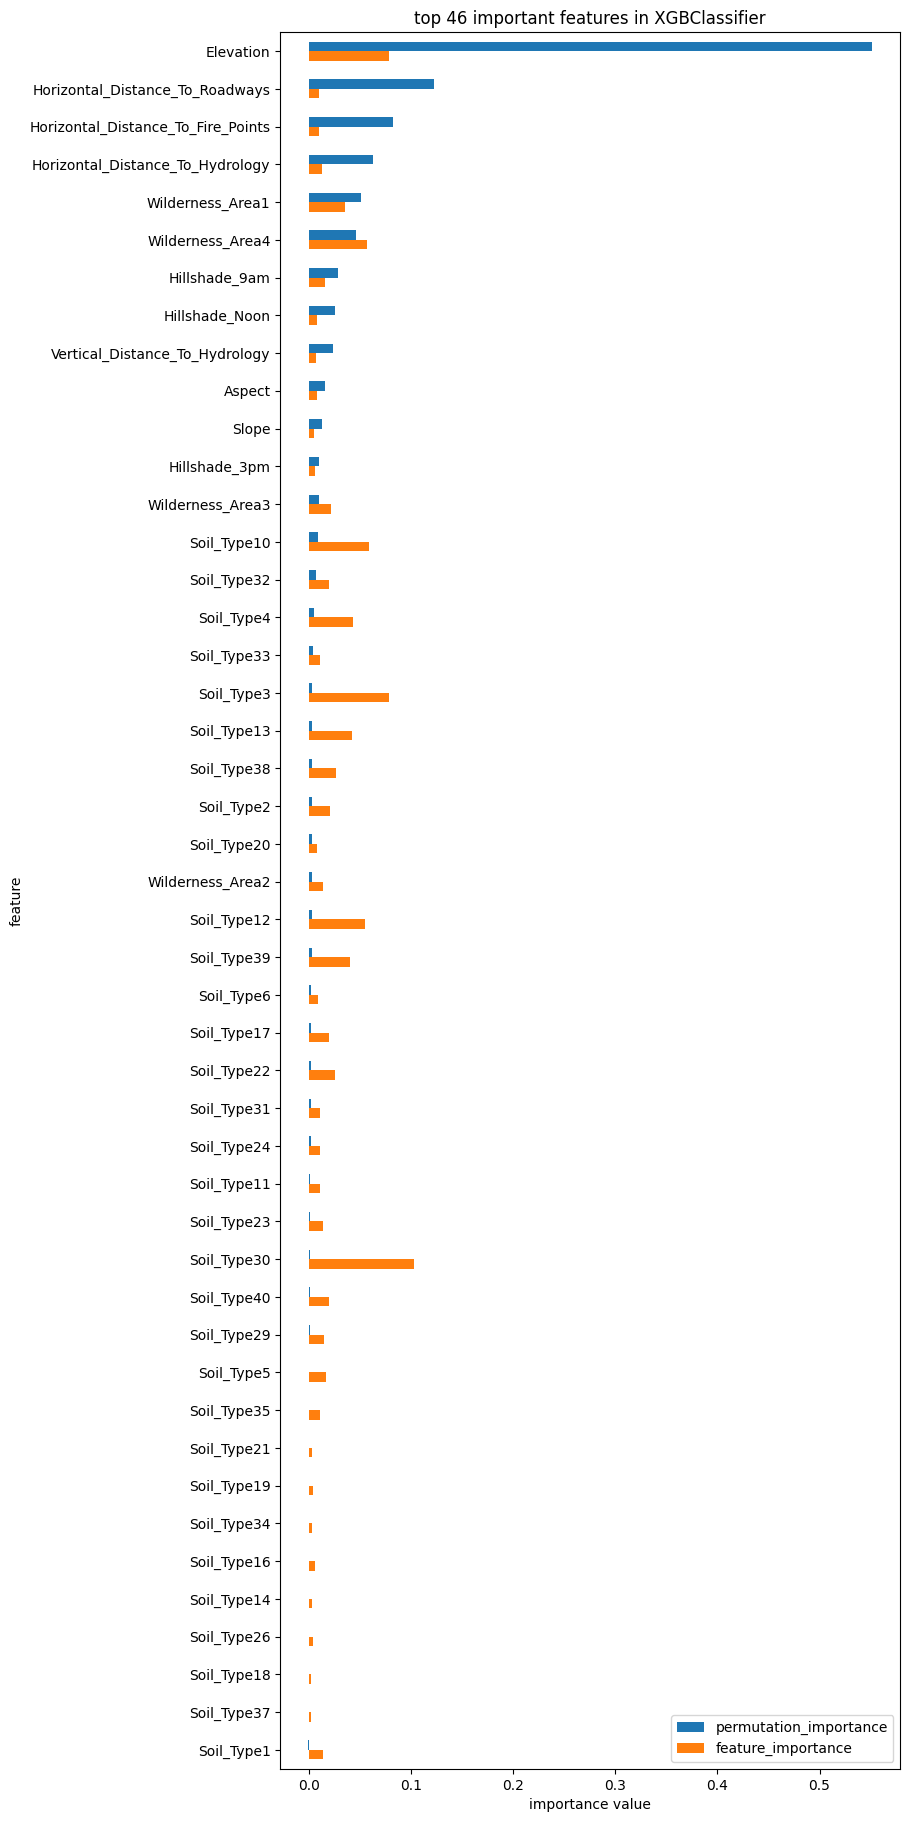

In [83]:
for i, estimator in enumerate(est2):
  print(f"********** {est_dict[estimator].__class__.__name__} **********")
  df_importance = important_features(estimator=estimator, est_dict=est_dict, X_val=X_val, y_val=y_val, selected_feat=selected_feat, n_feat=len(feat_name[0]), n_repeats=5)

In [84]:
len(feat_name[0])

46

In the presence of all the features, feature_importance_ of Id column ranks relatively high. Hence, feature_importance_ by itself cannot be a deciding factor. We drop 10% of skewed columns to get 82% accuracy

Text(0.5, 0, 'Importance value')

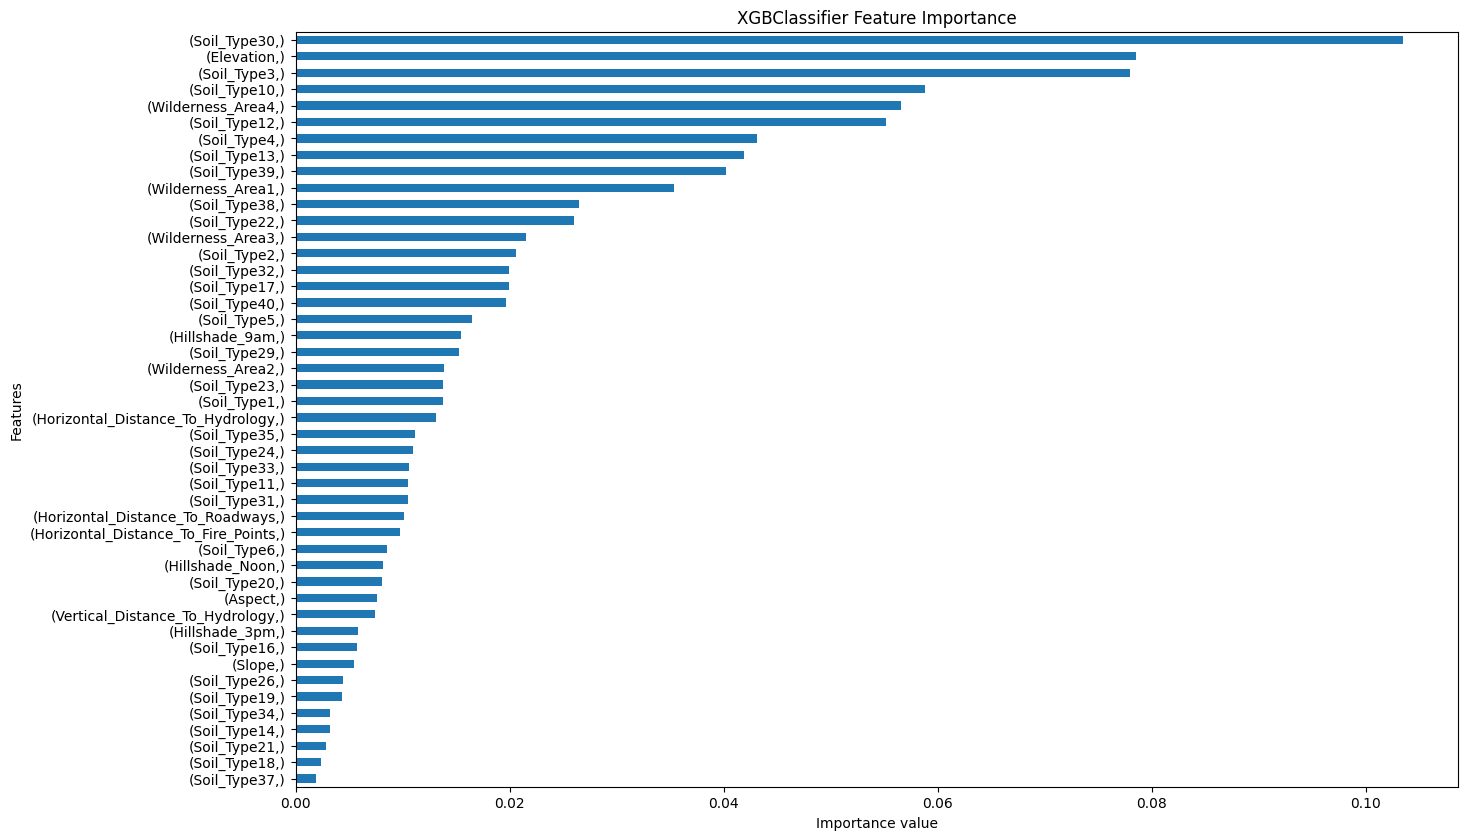

In [85]:
classsifier_name = clf_name(estimator=estimator, est_dict=est_dict)
importances = pd.Series(estimator.named_steps[classsifier_name.lower()].feature_importances_, feat_name).sort_values(ascending=True)
plt.figure(figsize=(15,10))
ax = importances.plot.barh()
ax.set_title(f"{classsifier_name} Feature Importance")
ax.set_ylabel("Features")
ax.set_xlabel("Importance value")

### Early stop over fitting

In [86]:
# XGBoost early stop fit
xform = make_pipeline(
    FunctionTransformer(wrangle, validate=False), 
    # ce.OrdinalEncoder(),
)


xform.set_params(functiontransformer__kw_args = kwargs_dict)

X_train_xform = xform.fit_transform(X_train)
X_val_xform = xform.transform(X_val)
# X_test_xform = xform.transform(X_test)

model = XGBClassifier(
    n_estimators = 1000,
    max_depth=8,
    learning_rate=0.5,
    num_parallel_tree = 10,
    n_jobs=-1
)

#eval_set
eval_set = [(X_train_xform, y_train), (X_val_xform, y_val)]

model.fit(X_train_xform, y_train, 
          eval_set=eval_set, 
          eval_metric=['merror', 'mlogloss'], 
          early_stopping_rounds=10,
          verbose=False) # Stop if the score hasn't improved in 10 rounds

print('Training Accuracy:', model.score(X_train_xform, y_train))
print('Validation Accuracy:', model.score(X_val_xform, y_val))

y_pred = model.predict(X_val_xform)


/Users/shahnam/.pyenv/versions/3.7.8/lib/python3.7/site-packages/xgboost/sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Training Accuracy: 0.9988425925925926
Validation Accuracy: 0.8558201058201058


dict_keys(['validation_0', 'validation_1'])


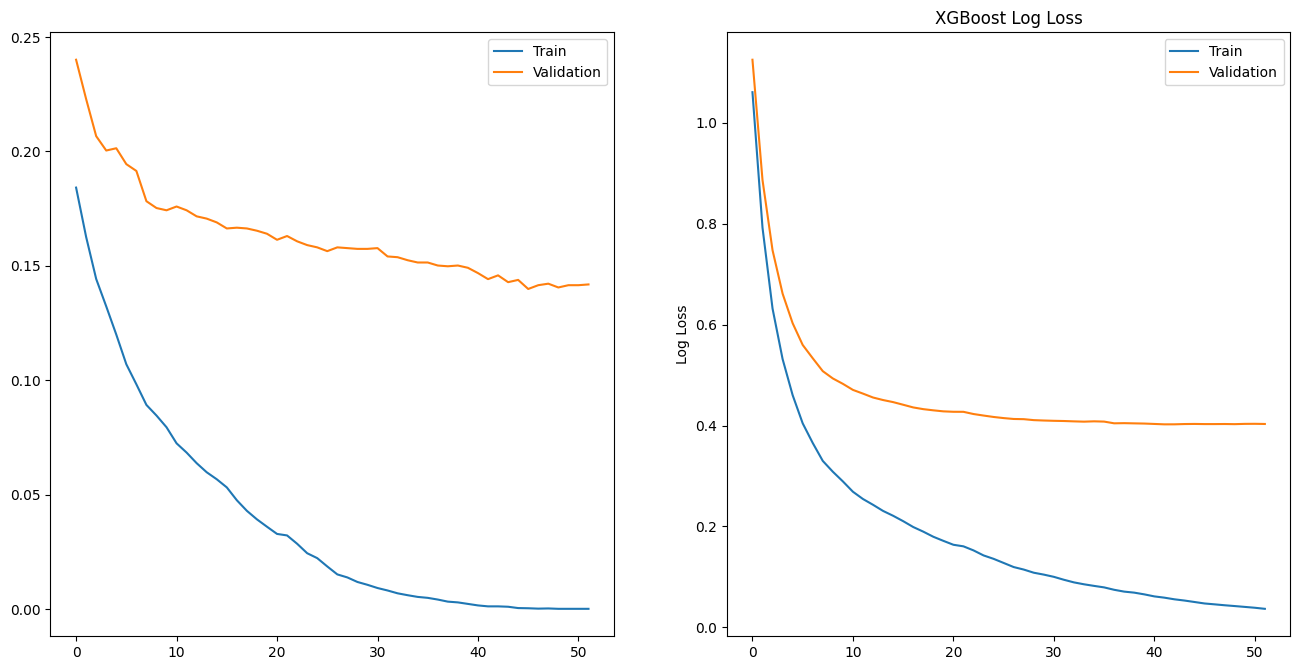

In [87]:
import matplotlib.pyplot as plt
# retrieve performance metrics
results = model.evals_result()
print(results.keys())

# number of successful rounds before early stop fitting
# 'validation_0' : training data, 'validation_1': val data
n_rounds = len(results['validation_1']["merror"])
x_axis = range(0, n_rounds)

# plot classification error
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,8))

ax1.plot(x_axis, results['validation_0']['merror'], label='Train')
ax1.plot(x_axis, results['validation_1']['merror'], label='Validation')
ax1.legend()
plt.ylabel('Classification MError')
plt.title('XGBoost Classification MError')

ax2.plot(x_axis, results['validation_0']['mlogloss'], label='Train')
ax2.plot(x_axis, results['validation_1']['mlogloss'], label='Validation')
ax2.legend()
plt.ylabel('Log Loss')
plt.title('XGBoost Log Loss')

plt.show()

### Cross Validation Curve: split the train set into train and validation for multiple folds

val scores [[0.71949405 0.72594246 0.72321429]
 [0.78819444 0.79042659 0.77876984]
 [0.79315476 0.80357143 0.79464286]
 [0.80233135 0.80679563 0.79365079]
 [0.80406746 0.80679563 0.80828373]
 [0.80753968 0.80753968 0.80332341]
 [0.79761905 0.80555556 0.79513889]
 [0.796875   0.80282738 0.79861111]
 [0.79662698 0.79563492 0.79365079]]
val scores mean [0.7228836  0.78579696 0.79712302 0.80092593 0.80638228 0.80613426
 0.79943783 0.79943783 0.79530423]


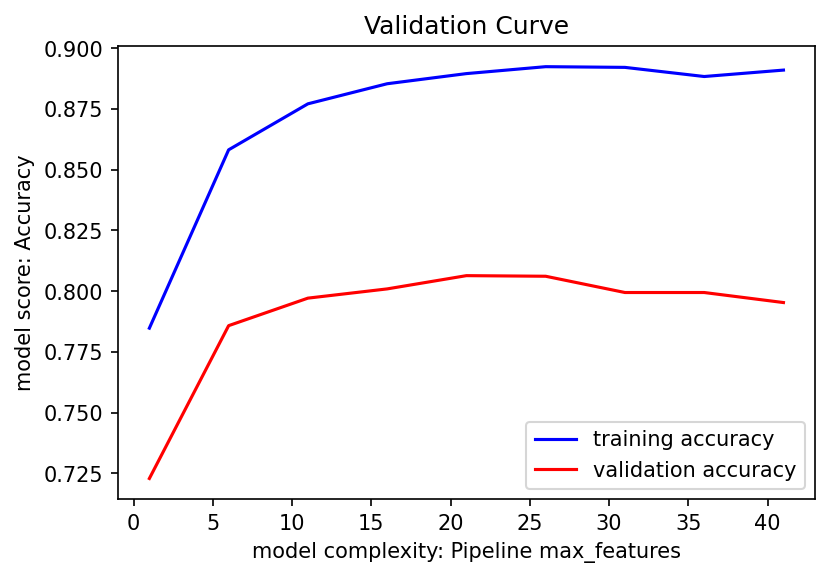

In [88]:
estimator=rfc
classifier_name = clf_name(estimator=estimator, est_dict=est_dict)

# # For FunctionTransformer
# par_name = "drop_count"
# param_range = [{par_name: i} for i in range(len(Id_skew_cols))]
# param_rangex = [i for i in range(len(Id_skew_cols))]

par_name = "max_features"
param_range = np.arange(1,len(feat_name[0]),5)
param_rangex = param_range
               
# par_name = "max_depth"
# param_range = range(1,25,1)
# param_rangex = param_range

# par_name = "min_samples_split"
# param_range = np.linspace(10, 0.01*len(X_train), 10, endpoint=True).astype(int)
# param_rangex = param_range

# par_name = "min_samples_leaf"
# param_range = np.linspace(2, 0.001*len(X_train), 10, endpoint=True).astype(int)
# param_rangex = param_range

# par_name = "criterion"
# param_range = ["gini", "entropy"]
# param_rangex = param_range

param_name=classifier_name.lower()+'__'+ par_name

estimator.set_params(functiontransformer__kw_args = kwargs_dict)

train_scores, val_scores = validation_curve(
    estimator, X_train, y_train,
    # param_name='functiontransformer__kw_args',
    param_name=param_name, 
    
    param_range=param_range, 
    scoring='accuracy', 
    cv=3,
    n_jobs=-1
)
print("val scores", val_scores)
print("val scores mean", np.mean(val_scores, axis=1))

# Averaging CV scores
plt.figure(dpi=150)
plt.plot(param_rangex, np.mean(train_scores, axis=1), color='blue', label='training accuracy')
plt.plot(param_rangex, np.mean(val_scores, axis=1), color='red', label='validation accuracy')
plt.title('Validation Curve')
plt.xlabel(f'model complexity: Pipeline {par_name}')
plt.ylabel('model score: Accuracy')
plt.legend();
# 9 sweeps and 3 folds

beyoun 30 features drop, validation accuracy starts going down.

### RandomizedSearchCV

In [36]:
# pipe = make_pipeline(FunctionTransformer(log_columns, ), PCA(), SVC())

# param_grid = dict(
#     functiontransformer__kw_args=[
#         {'col_idx': None},
#         {'col_idx': [1]}
#     ],
#     pca__n_components=[2, 5, 10],
#     svc__C=[0.1, 10, 100],
# )
# grid_search = GridSearchCV(pipe, param_grid=param_grid)

# digits = load_digits()
# res = grid_search.fit(digits.data, digits.target)      

### RandomizedSearchCV

In [89]:

x_n_iter = 10

param_distributions = {
    # 'simpleimputer__strategy': ['mean', 'median', 'most_frequent'], 
    #  'functiontransformer__kw_args': [{par_name: i} for i in range(int(0.5*len(Id_skew_cols)))],
    'randomforestclassifier__min_samples_leaf': [random.randint(1, 1000) for i in range(20)], 
    'randomforestclassifier__min_samples_split': [random.randint(2, 1000) for i in range(20)], 
    'randomforestclassifier__max_features': [random.randint(2, 54) for i in range(20)], 
    'randomforestclassifier__criterion': ["gini", "entropy"]
    }

rscv = RandomizedSearchCV(
    estimator, 
    param_distributions=param_distributions, 
    n_iter=x_n_iter, 
    cv=4, 
    scoring='accuracy', 
    verbose=10, 
    return_train_score=True, 
    n_jobs=-1
)

rscv.fit(X_train, y_train)

best_est = rscv.best_estimator_
print('Cross-validation Accuracy', rscv.best_score_)
print('Best hyperparameters', rscv.best_params_)
rscv.best_estimator_


Fitting 4 folds for each of 10 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    3.7s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done  35 out of  40 | elapsed:    4.1s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    4.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    4.2s finished


Cross-validation Accuracy 0.6975033068783069
Best hyperparameters {'randomforestclassifier__min_samples_split': 36, 'randomforestclassifier__min_samples_leaf': 85, 'randomforestclassifier__max_features': 7, 'randomforestclassifier__criterion': 'entropy'}


Pipeline(memory=None,
         steps=[('functiontransformer',
                 FunctionTransformer(accept_sparse=False, check_inverse=True,
                                     func=<function wrangle at 0x10ec08710>,
                                     inv_kw_args=None, inverse_func=None,
                                     kw_args={'cols': ['Id', 'Soil_Type15',
                                                       'Soil_Type7',
                                                       'Soil_Type25',
                                                       'Soil_Type8',
                                                       'Soil_Type28',
                                                       'Soil_Type9',
                                                       'Soil_Type36',
                                                       'Soil_Type27'],
                                              'drop_count': 9},
                                     validate=False)),
                ('ra...
  

In [90]:
best_feat = best_est.named_steps['functiontransformer'].transform(X_train).columns
best_feat, best_feat.shape

(Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
        'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
        'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
        'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1',
        'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
        'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
        'Soil_Type6', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12',
        'Soil_Type13', 'Soil_Type14', 'Soil_Type16', 'Soil_Type17',
        'Soil_Type18', 'Soil_Type19', 'Soil_Type20', 'Soil_Type21',
        'Soil_Type22', 'Soil_Type23', 'Soil_Type24', 'Soil_Type26',
        'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32',
        'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type37',
        'Soil_Type38', 'Soil_Type39', 'Soil_Type40'],
       dtype='object'),
 (46,))

In [91]:
#.predict: WITHOUT ACTUALLY TRANSFORMING X, APPLIES THE TRANSFORMS TO X AND PREDICT a fitted y
# wrangle_col = pipeline.named_steps['functiontransformer'].transform(X_train).columns


print(f' X_val shape before predict : {X_val.shape}')
print("predicting ...")
y_pred = best_est.predict(X_val)
print(f' X_val shape after predict : {X_val.shape}')
print('Validation Accuracy', accuracy_score(y_val, y_pred))

 X_val shape before predict : (3024, 55)
predicting ...
 X_val shape after predict : (3024, 55)
Validation Accuracy 0.6984126984126984


### ROC_AUC

* This is for binary classifiers

In [92]:
from sklearn.metrics import roc_curve, roc_auc_score

### Partial dependance plot with sklearn

In [93]:
# 
xform = make_pipeline(
    FunctionTransformer(wrangle, validate=False), 
    # ce.OrdinalEncoder(),
)


xform.set_params(functiontransformer__kw_args = kwargs_dict)

X_train_xform = xform.fit_transform(X_train)
X_val_xform = xform.transform(X_val)

model = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=20, max_features=0.5,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
                       oob_score=False, random_state=42, verbose=0,
                       warm_start=False)


model.fit(X_train_xform, y_train)


print('Training Accuracy:', model.score(X_train_xform, y_train))
print('Validation Accuracy:', model.score(X_val_xform, y_val))

y_pred = model.predict(X_val_xform)

Training Accuracy: 0.9002149470899471
Validation Accuracy: 0.8128306878306878


In [94]:
model.classes_

array([1, 2, 3, 4, 5, 6, 7])

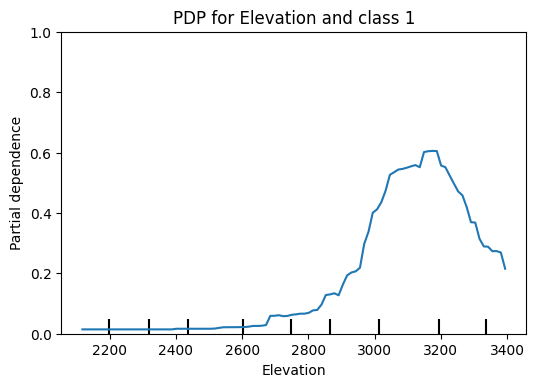

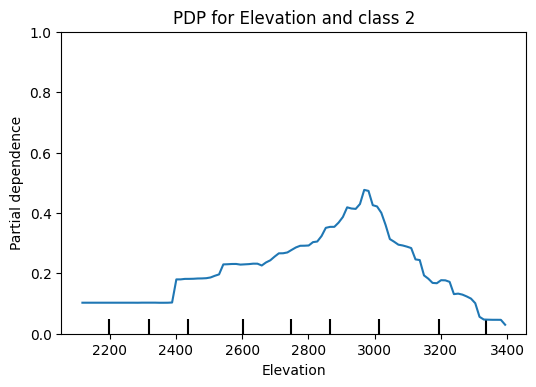

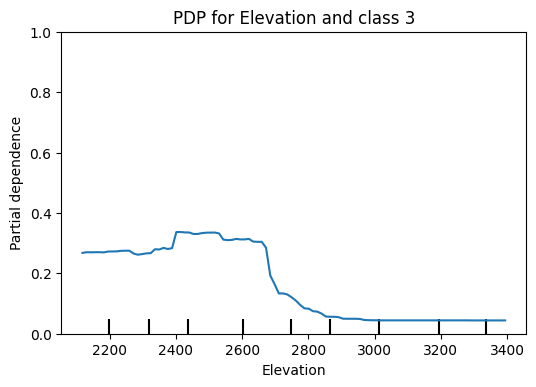

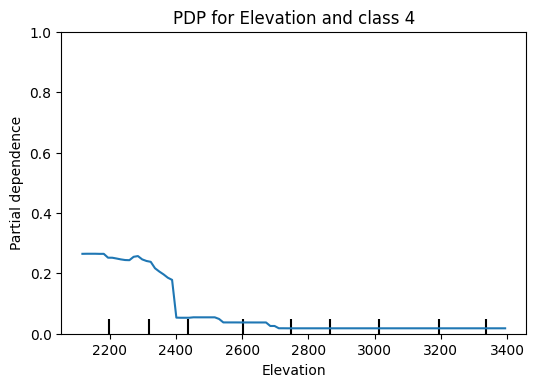

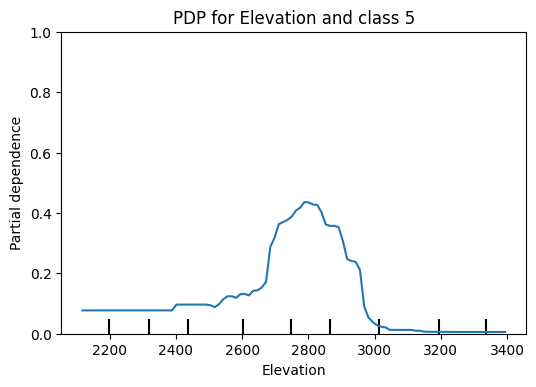

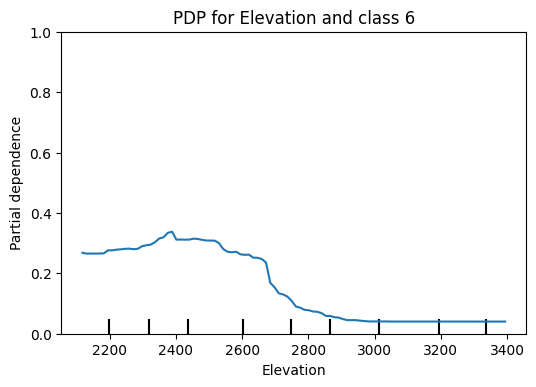

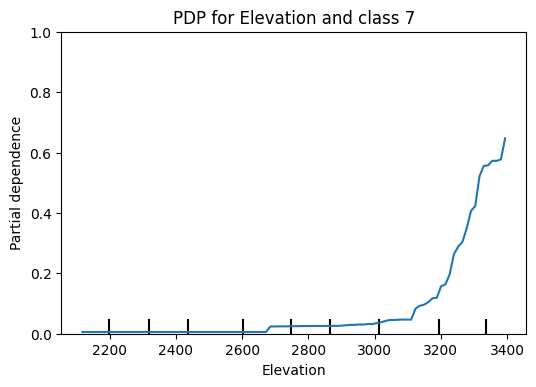

In [95]:
# In sklearn
from sklearn.inspection import partial_dependence, plot_partial_dependence

feature = ['Elevation']

for t in model.classes_:
  plot_partial_dependence(model, X_val_xform, feature, target=t)
  plt.ylim((0,1))
  plt.title(f'PDP for Elevation and class {t}')

### partial dependence with pdpbox

In [96]:
# In pdp
%%capture
# !pip install pdpbox

UsageError: Line magic function `%%capture` not found.


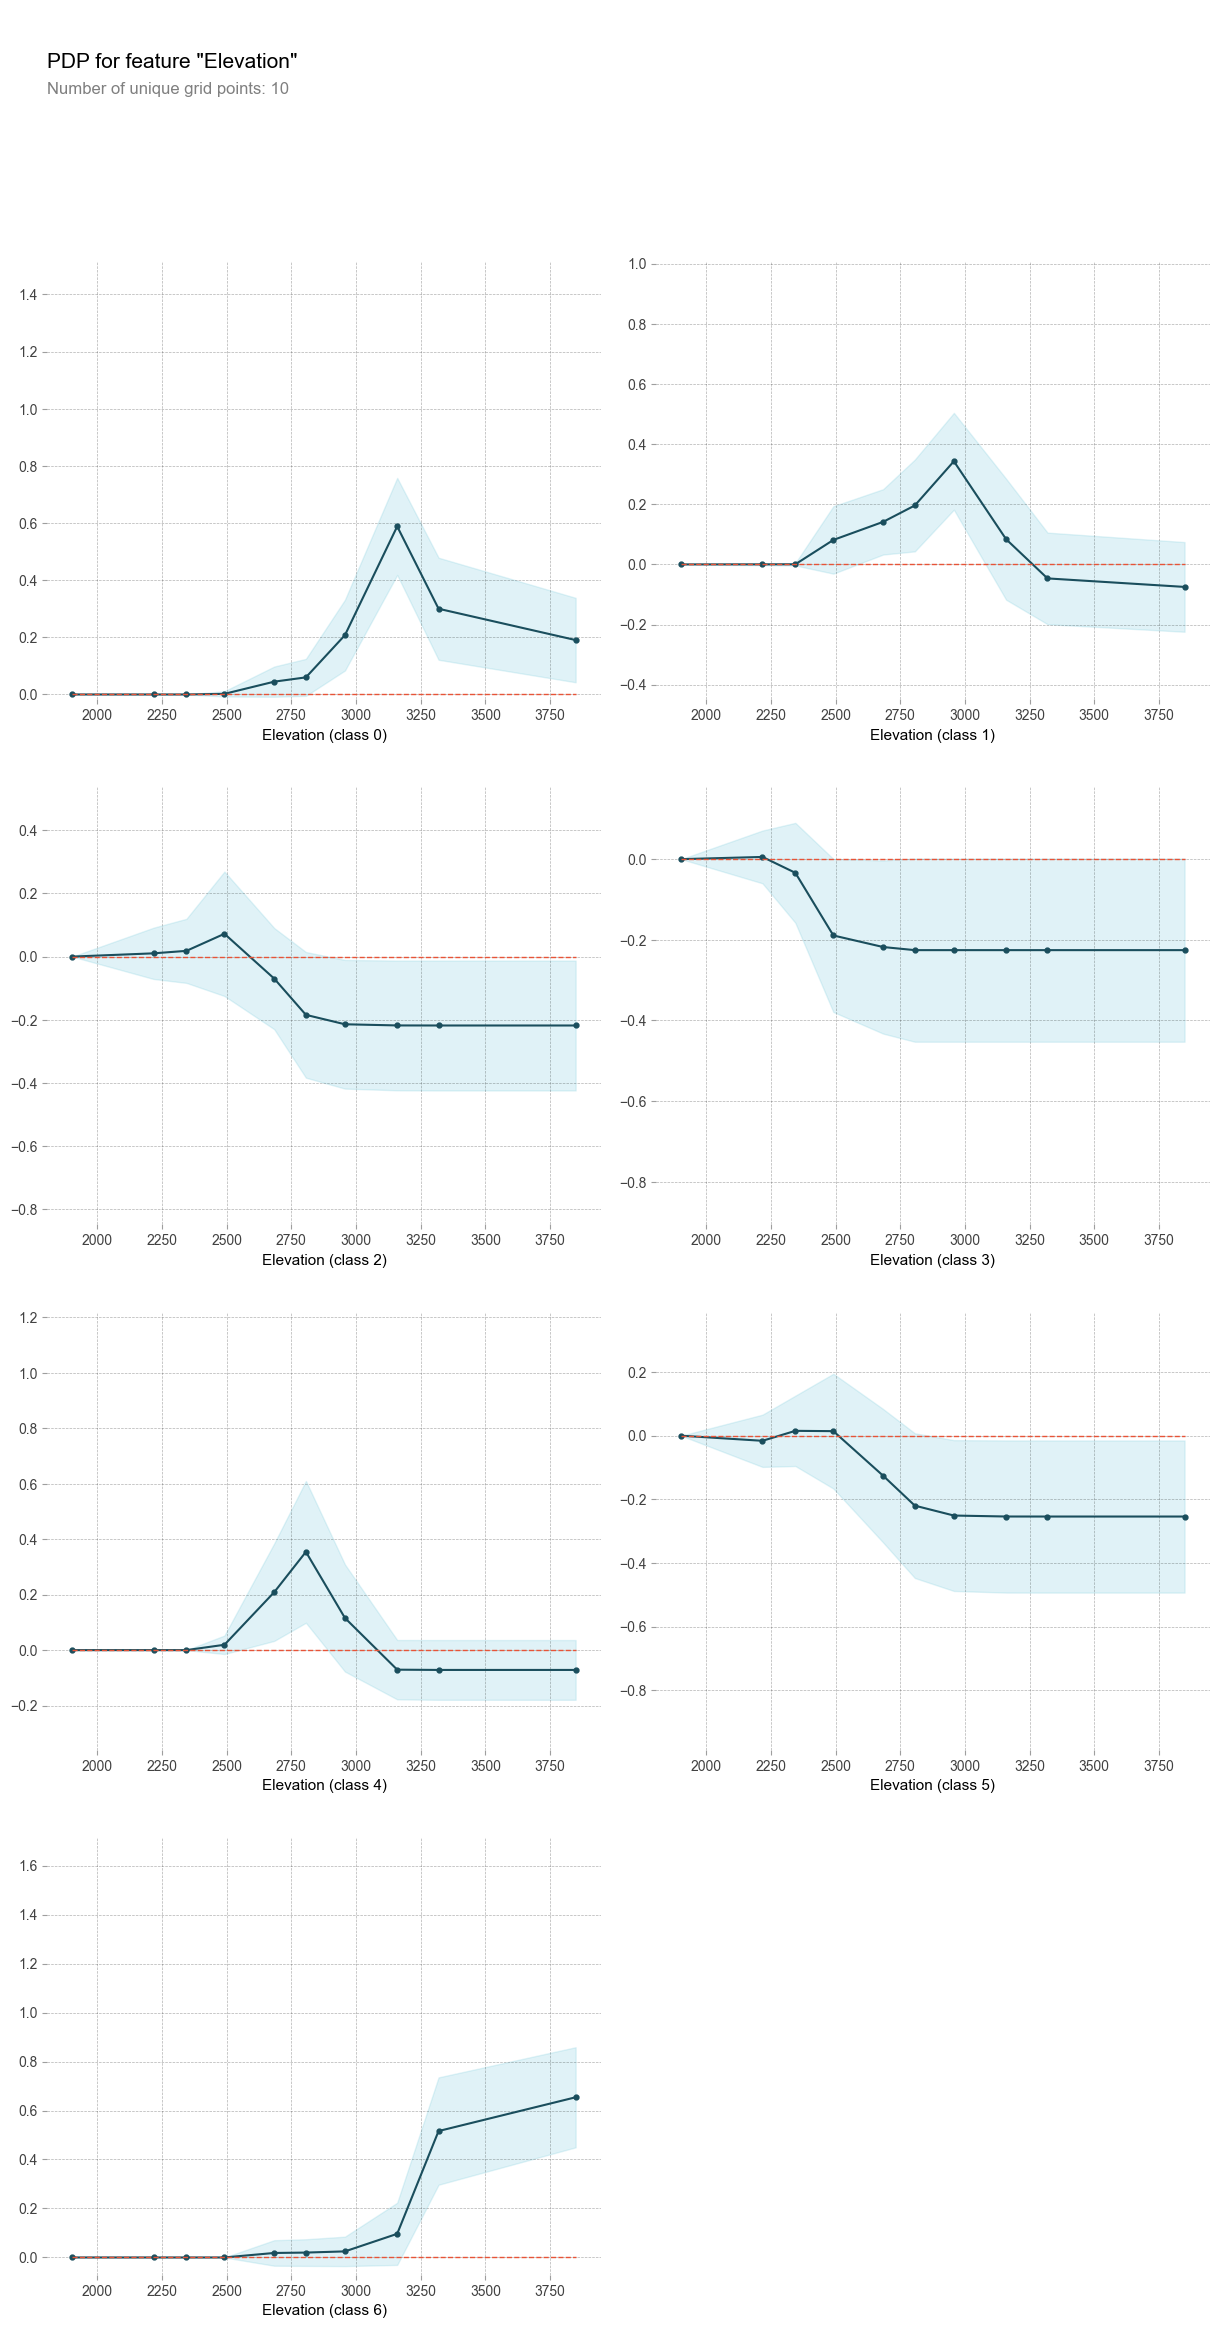

In [97]:
from pdpbox import pdp

feature = 'Elevation'
pdp_dist = pdp.pdp_isolate(model=model, 
                           dataset=X_val_xform, 
                           model_features=X_val_xform.columns, 
                           feature=feature)
pdp.pdp_plot(pdp_dist, feature, plot_lines=False);

In [98]:
df_importance.head()

,feature,permutation_importance,importances_std,feature_importance
1,Elevation,0.5515,0.005984,0.078538
6,Horizontal_Distance_To_Roadways,0.1228,0.006556,0.010158
10,Horizontal_Distance_To_Fire_Points,0.0821,0.002198,0.009804
4,Horizontal_Distance_To_Hydrology,0.0630,0.001957,0.013138
11,Wilderness_Area1,0.0515,0.003176,0.035315


In [99]:
from pdpbox.pdp import pdp_interact, pdp_interact_plot

In [103]:
features = ['Horizontal_Distance_To_Hydrology', 'Elevation']

interaction = pdp_interact(
    model=model,
    dataset=X_val_xform,
    model_features=X_val_xform.columns,
    features=features
)

(<Figure size 1500x950 with 5 Axes>,
 {'title_ax': <AxesSubplot:>,
  'pdp_inter_ax': [<AxesSubplot:xlabel='E (class 1)', ylabel='l'>,
   <AxesSubplot:xlabel='E (class 2)', ylabel='l'>]})

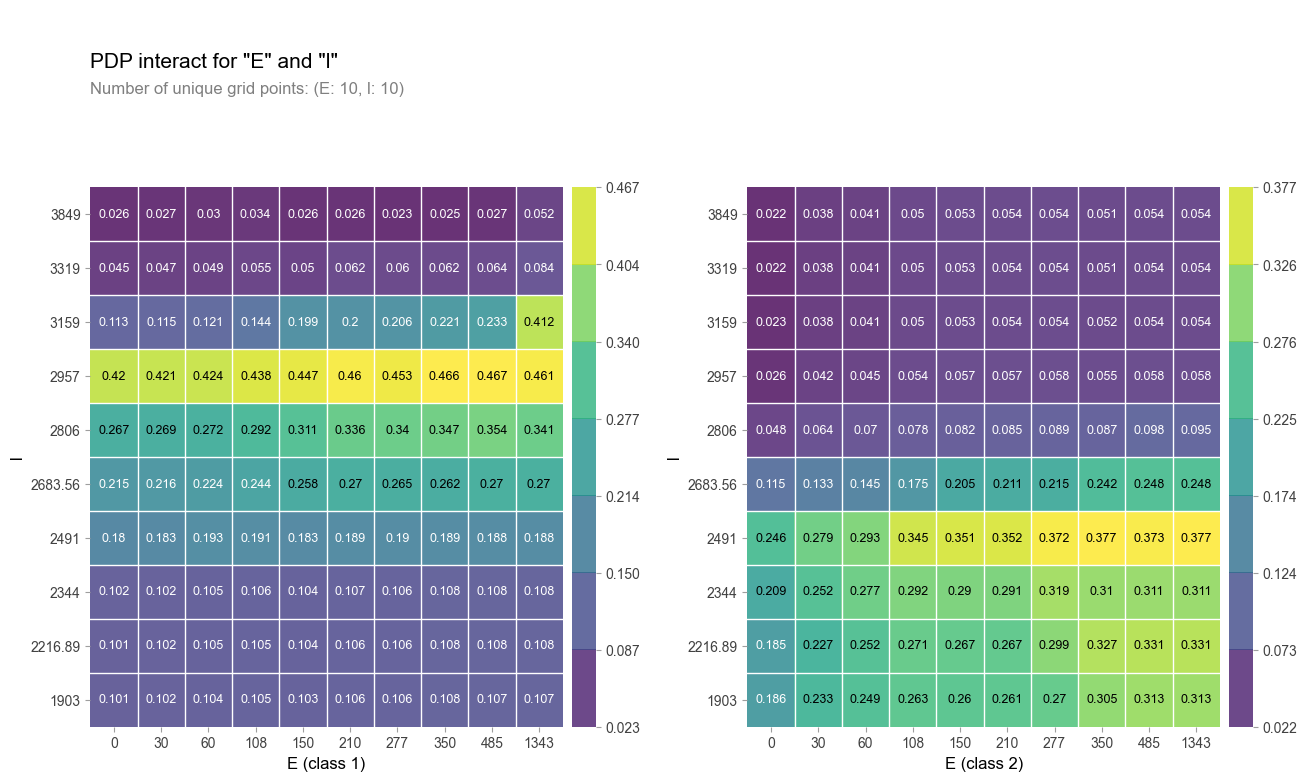

In [104]:
pdp_interact_plot(interaction, plot_type='grid', feature_names=feature,  which_classes=[1,2])

### Shaply

In [105]:
# Get an individual observation to explain.
# For example, the 0th row from the test set.
row = X_val_xform.iloc[[0]]
row

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
3551,2311,102,25,525,17,1392,252,199,59,947,...,0,0,0,0,0,0,0,0,0,0


In [106]:
# What was the actual cover type?
y_val.iloc[[0]]

3551    4
Name: Cover_Type, dtype: int64

In [107]:
# What does the model predict for this query?
model.predict(row)

array([4])

In [78]:
# !pip install shap

     |████████████████████████████████| 276kB 2.6MB/s eta 0:00:01
  Created wheel for shap: filename=shap-0.35.0-cp36-cp36m-linux_x86_64.whl size=394114 sha256=1d9313b5c680913c098b2035763bd55903ccdfa72430155c1b6179df426125d6
  Stored in directory: /root/.cache/pip/wheels/e7/f7/0f/b57055080cf8894906b3bd3616d2fc2bfd0b12d5161bcb24ac
Successfully built shap


In [115]:
# Why did the model predict this?
# Look at a Shapley Values Force Plot
import shap

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(row)
len(shap_values)

7

In [118]:
explainer.expected_value

array([0.14389054, 0.14088128, 0.14365079, 0.1431713 , 0.14309689,
       0.14280754, 0.14250165])

In [119]:
shap.initjs()
shap.force_plot(
    base_value=explainer.expected_value[0],
    shap_values=shap_values[0],
    features=row
)